This notebook contains exploratory data analysis of covid-19 trials.

In [1]:
import requests
import json
import pandas as pd
import datetime
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

Since we can get only 1000 trials as the result of this api query and the total number of covid-19 trials exceed 100, we will have to break our query in 2 parts. The first part will cover first thousand results `&min_rnk=1&max_rnk=1000`, the second part would cover next thousand `&min_rnk=1001&max_rnk=2000` and so on.

In [3]:
CDC_BASE_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1&max_rnk=1000&fmt=json'

In [4]:
cdc_extract_fields = [
    'NCTId',
    'DesignAllocation',
    'DesignMasking',
    'DesignMaskingDescription',
    'DesignPrimaryPurpose',
    'EnrollmentCount',
    'InterventionName',
    'InterventionType',
    'LastKnownStatus',
    'LeadSponsorName',
    'OutcomeAnalysisStatisticalMethod',
    'OutcomeMeasureTimeFrame',
    'LocationCountry',
    'StudyFirstPostDate',
    'StudyFirstPostDateType',
    'StudyFirstSubmitDate',
    'StudyFirstSubmitQCDate',
    'OverallStatus',
    'StudyType',
    'WhyStopped'
]

In [5]:
query_url = f'{CDC_BASE_URL}&fields={",".join(cdc_extract_fields)}'
print(query_url)

https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1&max_rnk=1000&fmt=json&fields=NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,LeadSponsorName,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,LocationCountry,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,OverallStatus,StudyType,WhyStopped


In [6]:
r = requests.get(query_url)
r.status_code

200

In [7]:
j = json.loads(r.content)
df1 = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df1.shape

(1000, 21)

In [8]:
# Let's get the next 1000
CDC_BASE_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1001&max_rnk=2000&fmt=json'
query_url = f'{CDC_BASE_URL}&fields={",".join(cdc_extract_fields)}'
r = requests.get(query_url)
r.status_code
j = json.loads(r.content)
df2 = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df2.shape

(373, 21)

In [9]:
df_base = pd.concat([df1, df2])
df_base.shape

(1373, 21)

There are total 1373 trials registered on clinicaltrials.gov for covid-19, as of may 8th 2020

In [10]:
df = df_base
df.head()

,Rank,NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,...,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,LocationCountry,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,OverallStatus,StudyType,WhyStopped
0,1,[NCT04372004],[Non-Randomized],[None (Open Label)],[],[Diagnostic],[100],[diagnostic tests for COVID-19 infection],[Diagnostic Test],[],...,[],[],[],"[May 1, 2020]",[Actual],"[April 29, 2020]","[April 29, 2020]",[Not yet recruiting],[Interventional],[]
1,2,[NCT04367805],[],[],[],[],[50],[nasopharyngeal Covid 19 RT-PCR],[Diagnostic Test],[],...,[],[],[France],"[April 29, 2020]",[Actual],"[April 27, 2020]","[April 27, 2020]",[Recruiting],[Observational],[]
2,3,[NCT04342637],[],[],[],[],[40],[Practice details],[Other],[],...,[],[],"[United States, Egypt, Egypt, Iran, Islamic Re...","[April 13, 2020]",[Actual],"[April 7, 2020]","[April 8, 2020]",[Recruiting],[Observational],[]
3,4,[NCT04323787],[],[],[],[],[50000],[observational],[Other],[],...,[],[],"[United States, United States, United States, ...","[March 27, 2020]",[Actual],"[March 24, 2020]","[March 25, 2020]",[Recruiting],[Observational],[]
4,5,[NCT04339322],[],[],[],[],[200],[Follow up],[Other],[],...,[],[],[],"[April 9, 2020]",[Actual],"[April 7, 2020]","[April 7, 2020]",[Not yet recruiting],[Observational],[]


In [11]:
tt = df['NCTId'].str[0]
tt.head()

0    NCT04372004
1    NCT04367805
2    NCT04342637
3    NCT04323787
4    NCT04339322
Name: NCTId, dtype: object

In [12]:
for col in df.columns[1:]:
    print(col)
    df[col] = df[col].str[0]

NCTId
DesignAllocation
DesignMasking
DesignMaskingDescription
DesignPrimaryPurpose
EnrollmentCount
InterventionName
InterventionType
LastKnownStatus
LeadSponsorName
OutcomeAnalysisStatisticalMethod
OutcomeMeasureTimeFrame
LocationCountry
StudyFirstPostDate
StudyFirstPostDateType
StudyFirstSubmitDate
StudyFirstSubmitQCDate
OverallStatus
StudyType
WhyStopped


In [13]:
df.head()

,Rank,NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,...,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,LocationCountry,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,OverallStatus,StudyType,WhyStopped
0,1,NCT04372004,Non-Randomized,None (Open Label),NaN,Diagnostic,100,diagnostic tests for COVID-19 infection,Diagnostic Test,NaN,...,NaN,NaN,NaN,"May 1, 2020",Actual,"April 29, 2020","April 29, 2020",Not yet recruiting,Interventional,NaN
1,2,NCT04367805,NaN,NaN,NaN,NaN,50,nasopharyngeal Covid 19 RT-PCR,Diagnostic Test,NaN,...,NaN,NaN,France,"April 29, 2020",Actual,"April 27, 2020","April 27, 2020",Recruiting,Observational,NaN
2,3,NCT04342637,NaN,NaN,NaN,NaN,40,Practice details,Other,NaN,...,NaN,NaN,United States,"April 13, 2020",Actual,"April 7, 2020","April 8, 2020",Recruiting,Observational,NaN
3,4,NCT04323787,NaN,NaN,NaN,NaN,50000,observational,Other,NaN,...,NaN,NaN,United States,"March 27, 2020",Actual,"March 24, 2020","March 25, 2020",Recruiting,Observational,NaN
4,5,NCT04339322,NaN,NaN,NaN,NaN,200,Follow up,Other,NaN,...,NaN,NaN,NaN,"April 9, 2020",Actual,"April 7, 2020","April 7, 2020",Not yet recruiting,Observational,NaN


In [14]:
df.StudyType.unique()

array(['Interventional', 'Observational', 'Expanded Access'], dtype=object)

### Distribution of Trial Registrations of CT.gov

In [15]:
df["StudyFirstPostDate"] = df["StudyFirstPostDate"].astype("datetime64")
df.StudyFirstPostDate.max(), df.StudyFirstPostDate.min()

(Timestamp('2020-05-08 00:00:00'), Timestamp('2011-03-01 00:00:00'))

According to WHO the first case of covid-19 was found in December 2019. So let's use that as a cutoff date

In [16]:
df = df[df.StudyFirstPostDate>datetime.date(2020,1,1)]
df.shape

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


(1338, 21)

In [17]:
df.StudyFirstPostDate.max(), df.StudyFirstPostDate.min()

(Timestamp('2020-05-08 00:00:00'), Timestamp('2020-01-27 00:00:00'))

^ Now the dates look good

In [18]:
df.groupby([df["StudyFirstPostDate"].dt.month]).NCTId.count()

StudyFirstPostDate
1      3
2     61
3    179
4    857
5    238
Name: NCTId, dtype: int64

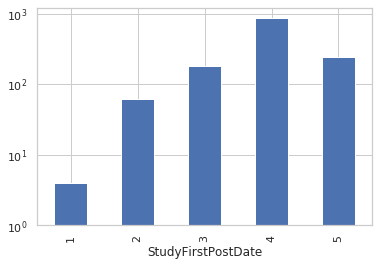

In [19]:
# Let's plot the resukts on log scale since it varies from 3 to 857
df.groupby([df["StudyFirstPostDate"].dt.month]).NCTId.count().plot(kind="bar", log=True)

### Covid-19 clinicaltrials since Jan 1st, 2020,<br>
Jan 2020 - 3<br>
Feb 2020 - 61<br>
Mar 2020 - 179<br>
Apr 2020 - 857<br>
May 2020 - 238 (till 8th May only)

### Let's look at the types of intervention

In [20]:
df.shape

(1338, 21)

In [21]:
# Select Interentional trials 
df = df[df.StudyType=='Interventional']
df.shape

(787, 21)

#### ^ Roughly 60% of trials are interventional

In [22]:
# Let's see what kind of interventions they are recieving
tt = pd.DataFrame(df.groupby("InterventionType").InterventionType.count())
tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
tt['Intervention_Type'] = tt.index
tt = tt.reset_index(drop=True)
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt

,Trial_Count,Intervention_Type
6,465,Drug
1,99,Biological
8,76,Other
3,48,Device
0,38,Behavioral
4,20,Diagnostic Test
9,18,Procedure
5,11,Dietary Supplement
2,7,Combination Product
10,3,Radiation


#### ^ As expected majority of the trials (564 out of 787, or 71.66 %) are recieving Drug or Biological interventions.

#### However, surprisingly only 20 trials (~ 2.5%) are associated with diagnostic tests.

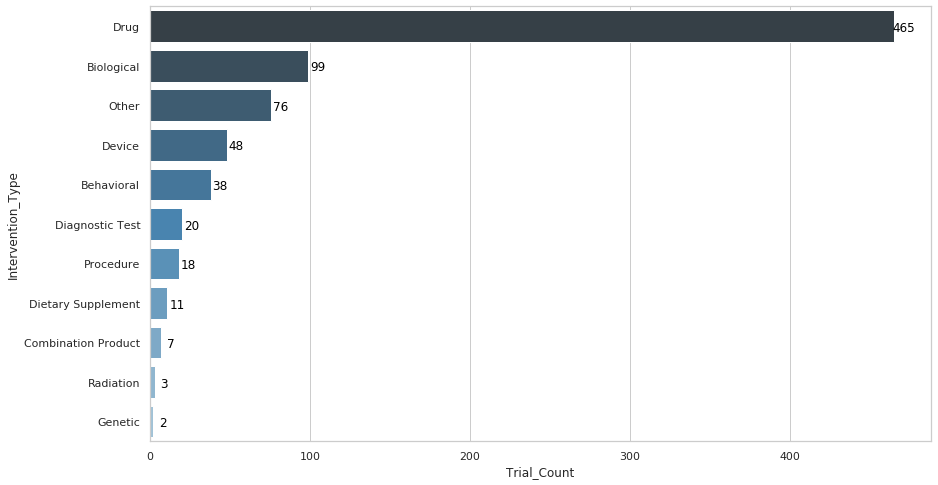

In [23]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

In [24]:
tt = pd.DataFrame(df.groupby("DesignPrimaryPurpose").DesignPrimaryPurpose.count())
tt = tt.rename(index=str, columns={"DesignPrimaryPurpose": "Trial_Count"})
tt['Primary_Purpose'] = tt.index
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt = tt.reset_index(drop=True)
tt

,Trial_Count,Primary_Purpose
0,569,Treatment
1,106,Prevention
2,32,Supportive Care
3,28,Diagnostic
4,27,Other
5,11,Health Services Research
6,6,Basic Science
7,6,Screening
8,2,Device Feasibility


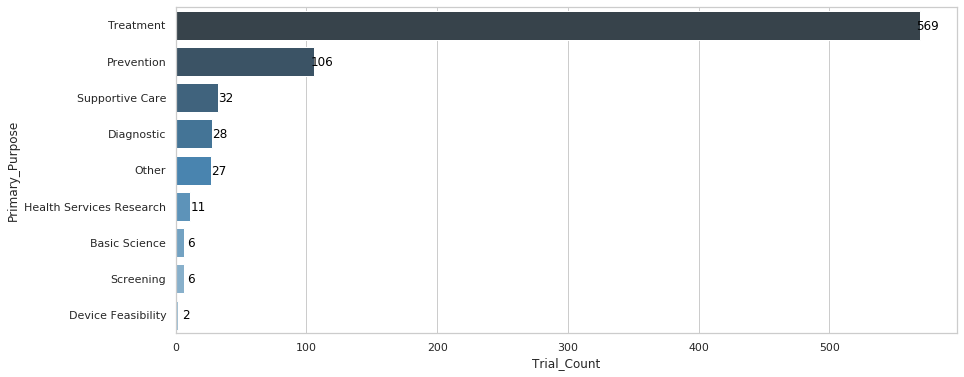

In [25]:
plt.figure(figsize=(14,6))
graph = sns.barplot(y="Primary_Purpose", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

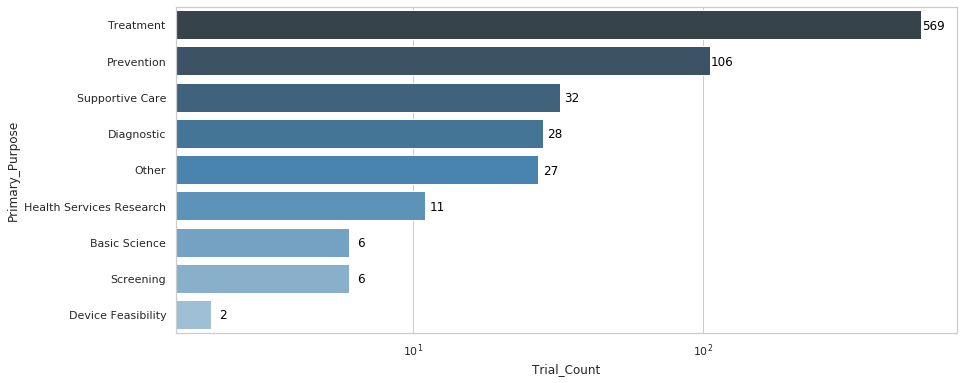

In [26]:
# Adding log scale to make the viz better
plt.figure(figsize=(14,6))
graph = sns.barplot(y="Primary_Purpose", x="Trial_Count", data=tt, palette="Blues_d", log=True)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+(p.get_width()/10), p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

**What type of interventions are used in treatment of covid-19?**

In [27]:
tt = df.loc[df.DesignPrimaryPurpose=='Treatment',]
tt.shape

(569, 21)

In [28]:
tt = pd.DataFrame(tt.groupby("InterventionType").InterventionType.count())
tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
tt['Intervention_Type'] = tt.index
tt = tt.reset_index(drop=True)
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt

,Trial_Count,Intervention_Type
5,397,Drug
1,75,Biological
7,34,Other
3,27,Device
0,10,Behavioral
8,10,Procedure
2,7,Combination Product
4,6,Dietary Supplement
9,2,Radiation
6,1,Genetic


Text(0.5, 1.0, 'Intervention Type distribution where Purpose = Treatment')

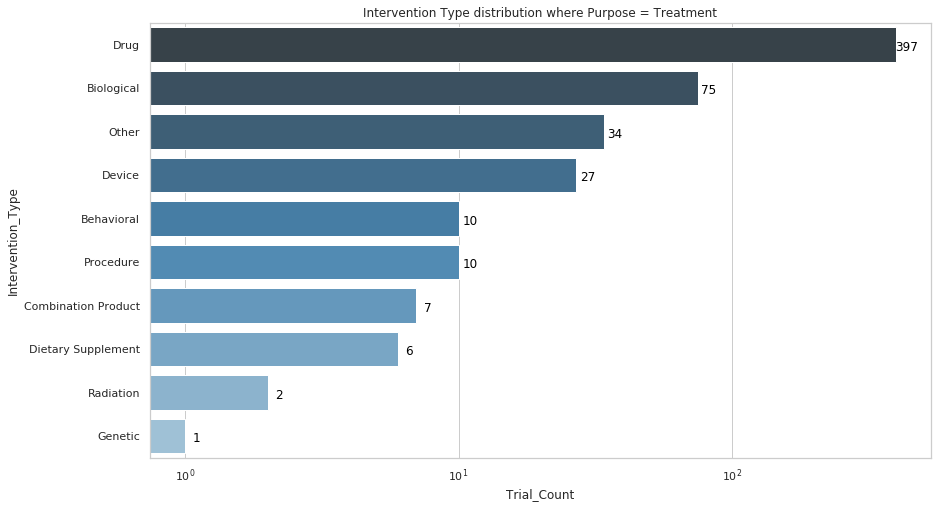

In [29]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d", log=True)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+(p.get_width()/10), p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')
graph.set_title('Intervention Type distribution where Purpose = Treatment')

**What are some widely used drugs for treatment of covid-19?**

In [30]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((274, 2),
                InterventionName  NCTId
 121          Hydroxychloroquine     36
 241                 Tocilizumab     11
 101                 Favipiravir      7
 129  Hydroxychloroquine Sulfate      6
 69                   Colchicine      6
 203                  Remdesivir      5
 206                 Ruxolitinib      5
 33                 Azithromycin      5
 212                   Sarilumab      4
 160         Lopinavir/ritonavir      4
 122    Hydroxychloroquine (HCQ)      3
 50            Camostat Mesilate      3
 178            Nitric Oxide Gas      3
 18                     Anakinra      3
 37                  Baricitinib      3)

Let's standardize the treatments, and look at top 5 or 7 drugs

In [35]:
df.InterventionName.replace(to_replace='Hydroxychloroquine Sulfate',value='Hydroxychloroquine',inplace=True)
df.InterventionName.replace(to_replace='Hydroxychloroquine (HCQ)',value='Hydroxychloroquine',inplace=True)

tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((272, 2),
         InterventionName  NCTId
 121   Hydroxychloroquine     45
 239          Tocilizumab     11
 101          Favipiravir      7
 69            Colchicine      6
 204          Ruxolitinib      5
 201           Remdesivir      5
 33          Azithromycin      5
 210            Sarilumab      4
 158  Lopinavir/ritonavir      4
 66          Clazakizumab      3
 18              Anakinra      3
 166   Methylprednisolone      3
 159             Losartan      3
 75                DAS181      3
 37           Baricitinib      3)

#### What therapies are combined with Hydroxychloroquine?

In [36]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs[covid_drugs.InterventionName.str.contains('Hydroxychloroquine')]

,InterventionName,NCTId
121,Hydroxychloroquine,45
129,Hydroxychloroquine Sulfate Regular dose,2
59,Chloroquine or Hydroxychloroquine,1
130,Hydroxychloroquine and Azithromycin,1
122,Hydroxychloroquine + Azithromycin,1
123,Hydroxychloroquine + azithromycin,1
124,Hydroxychloroquine + placebo,1
125,Hydroxychloroquine 200 Mg Oral Tablet,1
126,Hydroxychloroquine Oral Product,1
127,Hydroxychloroquine SAR321068,1


<pre>
^ Azithromycin looks like a top choice for combination with Hydroxychloroquine.

Azithromycin is an antibiotic that fights bacteria. It is used to treat many different types of infections caused by bacteria, such as respiratory infections, skin infections, ear infections, eye infections, and 
sexually transmitted diseases. - <a href="https://www.drugs.com/azithromycin.html">drugs.com</a>
</pre>


**What kind of biological interventions are used for treatment of covid-19?**

In [37]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Biological'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((62, 2),
                                      InterventionName  NCTId
 17                                Convalescent Plasma      7
 21                                Convalescent plasma      3
 56                anti-SARS-CoV-2 convalescent plasma      3
 50                                            UC-MSCs      3
 30                                               MSCs      2
 0                              Allogeneic NK transfer      1
 41                             Ozone auto-hemotherapy      1
 44                                    Plasma exchange      1
 43                                             Plasma      1
 42                             Pathogen-specific aAPC      1
 39                                          NestCell®      1
 40                                           Otilimab      1
 38                                              NT-17      1
 37  NK cells,IL15-NK cells,NKG2D CAR-NK cells,ACE2...      1
 36                                           NK Cells      

#### What kind of dietary supplements are used?

In [39]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Dietary Supplement'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_supplement = tt1.sort_values('NCTId', ascending=False); covid_supplement

,InterventionName,NCTId
0,Ketogenic diet,1
1,Natural Honey,1
2,Vitamin C,1
3,Vitamin D,1
4,Vitamins,1
5,Zinc gluconate,1


**Which countries are part of the covid-19 trials?**

In [43]:
len(df.LocationCountry.unique()), df.LocationCountry.unique()

(52,
 array([nan, 'Colombia', 'Egypt', 'Belgium', 'France', 'Thailand',
        'United States', 'China', 'Canada', 'Iceland', 'India', 'Chile',
        'Austria', 'Italy', 'Spain', 'Turkey', 'Iran, Islamic Republic of',
        'Switzerland', 'Mexico', 'Jordan', 'Malaysia', 'French Guiana',
        'Germany', 'Denmark', 'Hong Kong', 'Saudi Arabia', 'Pakistan',
        'Russian Federation', 'South Africa', 'United Kingdom', 'Tunisia',
        'Bosnia and Herzegovina', 'Australia', 'Poland', 'Brazil',
        'Bahrain', 'Argentina', 'Israel', 'Greece', 'Netherlands',
        'Korea, Republic of', 'Vietnam', 'Sweden', 'Norway', 'Ireland',
        'Puerto Rico', 'Slovenia', 'Nigeria', 'Iraq', 'Indonesia',
        'Gibraltar', 'Romania'], dtype=object))

<pre>
^ The trials are based in 52 countries.

This does NOT seem right, the number seems too low. The United Nations has 193 countries. So probably the  information on sites is not updated.

Interestingly (rather unfortunately) there are hardly any countries from Africa.
</pre>

**How many total subject are part of these trials?**

In [53]:
df['EnrollmentCount'] = pd.to_numeric(df['EnrollmentCount'])
df.EnrollmentCount.sum()

913577

<pre>
Considering the total covid-19 cases are around 4M, this number of 1M seems a little high.

This might be a data entry error. So let's explore more.
</pre>

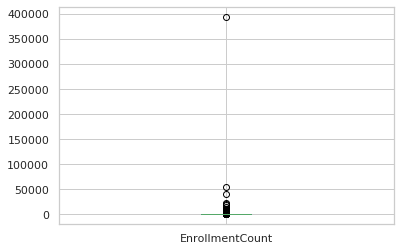

In [55]:
df.boxplot(column='EnrollmentCount')

<pre> There seems to be a outlier - single trial, which is almost 10 times bigger than the second biggest trial. </pre>

In [60]:
df.EnrollmentCount.max()

394578

In [58]:
df[df.EnrollmentCount==df.EnrollmentCount.max()].NCTId

144    NCT04370886
Name: NCTId, dtype: object

<pre>So the trial NCT04370886 has expected enrollment of 394,578. If you check the trials on clinicaltrials.gov the information is true, however this is a trial is to "Recruit Blood Donors Via SMS With Different Contents During Epidemic of COVID-19". 

We can eliminate these types of trials by adding a filter of PrimaryPurpose=Treatment.
</pre>

In [59]:
tt = df[df.DesignPrimaryPurpose=='Treatment']
tt.EnrollmentCount.sum()

195478

<pre>The enrollment count is approaching 200,000 for the trials treating covid-19. 

Even this number should be taken with a grain of salt as
- not all trials will meet their enrollmemt targets
- there might be more inteventional trials which are not yet registered on clinicaltrials.gov
</pre>

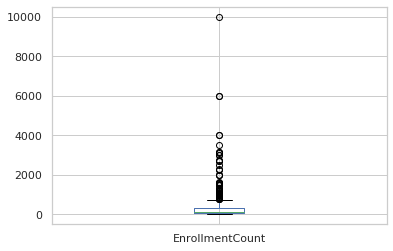

In [62]:
tt.boxplot(column='EnrollmentCount')

In [63]:
tt[tt.EnrollmentCount==tt.EnrollmentCount.max()].NCTId

816    NCT04343001
Name: NCTId, dtype: object

<pre> 
NCT04343001 is an interesting trial by London School of Hygiene and Tropical Medicine with expected 
enrollment of 10,000.
</pre>

**What are the leading sponsors running the covid-19 trials?**

In [45]:
len(df.LeadSponsorName.unique())

525

In [46]:
df.shape

(787, 21)

<pre>
^ Wow, there are more than 500+ unique lead sponsors for 787 interventional trials.

Let's look at the top sponsors with maximum number of (expected) enrollment.</pre>

In [47]:
#tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Biological'),]
tt1 = df.groupby('LeadSponsorName', as_index=False).EnrollmentCount.sum()
covid_drugs = tt1.sort_values('EnrollmentCount', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((525, 2),
                                        LeadSponsorName EnrollmentCount
 507                                Versailles Hospital            9950
 276                                       Megan Landes             988
 500                      University of the Philippines             960
 181                                       Huilan Zhang              96
 429                                        UMC Utrecht         9501500
 132                      Fundación de investigación HM              94
 487                               University of Padova              92
 121                                   Fondation Lenval             914
 421                       The University of Queensland            9000
 360                         Saint Luke's Health System             900
 304                                         Noah Merin              90
 64                                      Carlos Tornero              90
 0                                        4D pharma p

Let's make this exploration interactive

In [29]:
from ipywidgets import interact

In [34]:
@interact(Purpose=['Treatment', 'Prevention', 'Supportive Care','Diagnostic'])
def plot(Purpose):
    tt = df.loc[df.DesignPrimaryPurpose==Purpose,]
    tt = pd.DataFrame(tt.groupby("InterventionType").InterventionType.count())
    tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
    tt['Intervention_Type'] = tt.index
    tt = tt.reset_index(drop=True)
    tt=tt.sort_values(by=['Trial_Count'], ascending=False)
    plt.figure(figsize=(14,8))
    graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6), ha='center', va='bottom', color= 'black')

interactive(children=(Dropdown(description='Purpose', options=('Treatment', 'Prevention', 'Supportive Care', '…

In [33]:
@interact(Intervention=['Drug','Biological','device','Behavioral','Dietary Supplement'])
def plot(Intervention):
    tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType==Intervention),]
    tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
    covid_drugs = tt1.sort_values('NCTId', ascending=False)
    print(covid_drugs.iloc[:15,])

interactive(children=(Dropdown(description='Intervention', options=('Drug', 'Biological', 'device', 'Behaviora…